<a href="https://colab.research.google.com/github/EmilyJarecki/ElmhurstUni/blob/main/Week_4_White_Wine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Upload Wine Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving binary white wine quality.xlsx to binary white wine quality (2).xlsx


In [ ]:
import io

# Get the name of the uploaded file dynamically
file_name = list(uploaded.keys())[0]

data = pd.read_excel(io.BytesIO(uploaded[file_name]),header=0)

data = data.dropna()
print(data.shape)
print(list(data.columns))

(4898, 13)
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'good_wine']


In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_wine
0,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
1,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
3,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
4,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


### Data Exploration

In [ ]:
data['good_wine'].value_counts()

,count
good_wine,
0,3838
1,1060


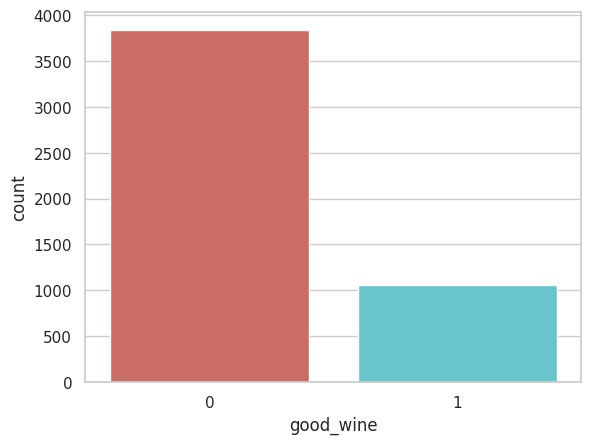

In [ ]:
sns.countplot(x='good_wine', data=data, hue='good_wine', palette='hls', legend=False)
plt.show()

#### Percentages

In [ ]:
count_not_good = len(data[data['good_wine']==0])
count_good = len(data[data['good_wine']==1])
pct_of_not_good = count_not_good/(count_not_good+count_good)
print("percentage of not good wine is", pct_of_not_good*100)
pct_of_good_wine = count_good/(count_not_good+count_good)
print("percentage of good wine", pct_of_good_wine*100)

percentage of not good wine is 78.35851367905268
percentage of good wine 21.641486320947326


#### Exploration

In [ ]:
data.groupby('good_wine').mean(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
good_wine,,,,,,,,,,,,
0,6.890594,0.281802,0.336438,6.703478,0.047875,35.517327,141.982934,0.994474,3.180847,0.487004,10.265215,5.519802
1,6.725142,0.265349,0.326057,5.261509,0.038160,34.550472,125.245283,0.992412,3.215132,0.500142,11.416022,7.174528


### Decision Tree Modeling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create independent and dependent variables
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = data['good_wine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)

DecisionTreeClassifier()

#### Accuracy

In [ ]:
y_pred = dectree.predict(X_test)
print('Accuracy of decision tree classifier on test set:', dectree.score(X_test, y_test))

Accuracy of decision tree classifier on test set: 0.8224489795918367


#### Confusion Matrix

[[1015  148]
 [ 113  194]]


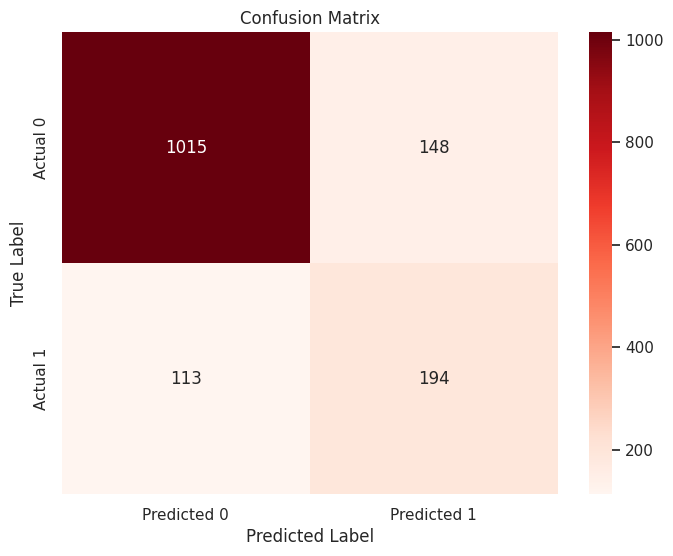

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Precision & Recall

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1163
           1       0.57      0.63      0.60       307

    accuracy                           0.82      1470
   macro avg       0.73      0.75      0.74      1470
weighted avg       0.83      0.82      0.83      1470



* Precision:  how often an ML model is correct when predicting the target class.
<br>
* Recall: whether an ML model can find all objects of the target class.
<br>
* F1-score: combines the precision and recall scores of a model
<br>
* Support: how frequently a specific itemset (a group of related items) appears within a dataset




#### ROC (Receiver Operating Characteristic) Curve & AUC (Area Under the Curve) Score

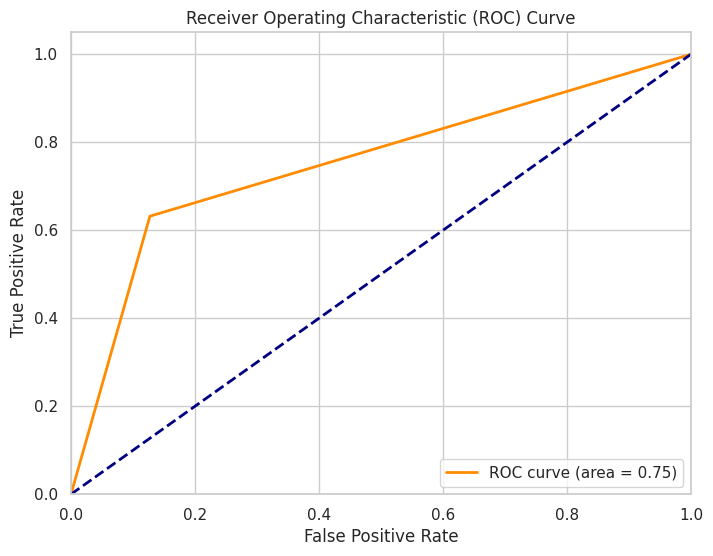

AUC score: 0.7523323651905522


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Predict probabilities for the positive class (good wine)
y_pred_proba = dectree.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print('AUC score:', roc_auc_score(y_test, y_pred_proba))

### Logistic Regression Modeling

In [ ]:
# Create independent and dependent variables
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = data['good_wine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create and train the logistic regression model
# max_iter to prevent error
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

#### Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = logreg.predict(X_test)

print("Accuracy of Logistic Regression on test set:", accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression on test set: 0.8020408163265306


#### Confusion Matrix

[[1103   60]
 [ 231   76]]


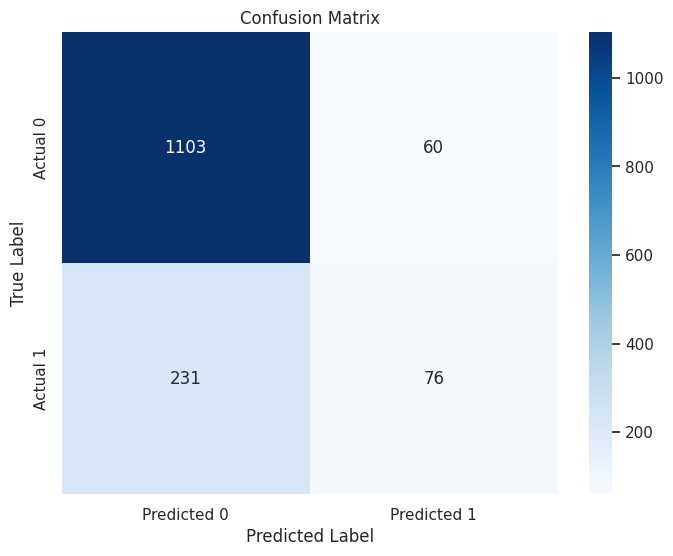

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#### Precision & Recall

In [ ]:
from sklearn.metrics import classification_report

# zero_division parameter added so that it's never divided by 0
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      1163
           1       0.56      0.25      0.34       307

    accuracy                           0.80      1470
   macro avg       0.69      0.60      0.61      1470
weighted avg       0.77      0.80      0.77      1470



#### ROC Curve and AUC Score

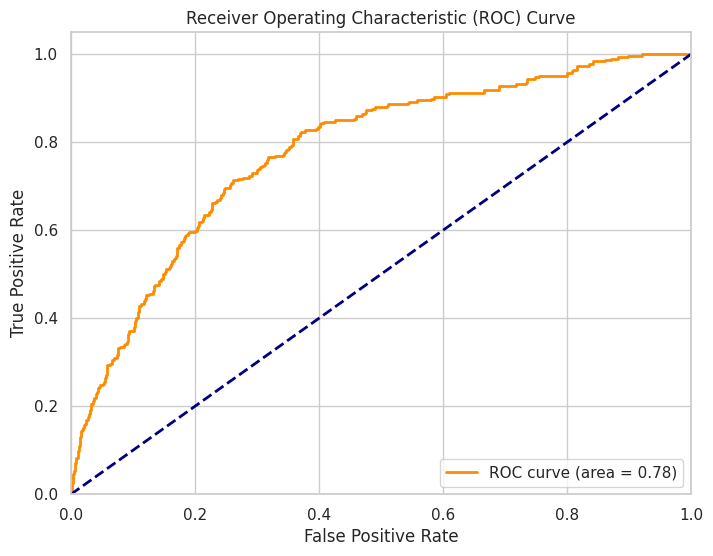

AUC score: 0.7795799361978036


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Predict probabilities for the positive class (good wine)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print('AUC score:', roc_auc_score(y_test, y_pred_proba))

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

naiveb = GaussianNB()
naiveb.fit(X_train, y_train)

GaussianNB()

#### Accuracy

In [ ]:
y_pred = naiveb.predict(X_test)
print('Accuracy of Naive Bayes on test set:', naiveb.score(X_test, y_test))

Accuracy of Naive Bayes on test set: 0.7163265306122449


#### Confusion Matrix

[[845 318]
 [ 99 208]]


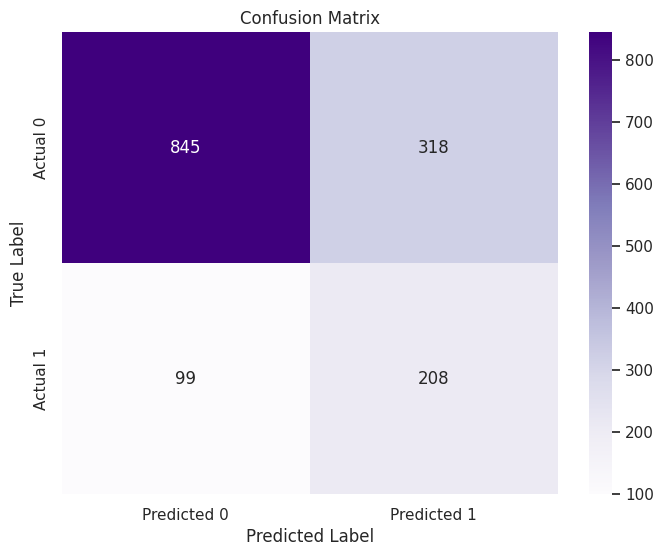

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Precision & Recall

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1163
           1       0.40      0.68      0.50       307

    accuracy                           0.72      1470
   macro avg       0.65      0.70      0.65      1470
weighted avg       0.79      0.72      0.74      1470



#### ROC Curve and AUC Score

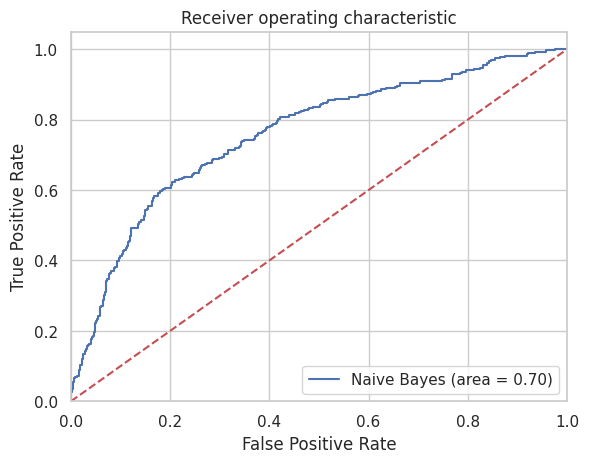

AUC score: 0.7020468237541346


In [ ]:
import matplotlib.pyplot as plt

# ROC Curve and AUC Score for Naive Bayes
naiveb_roc_auc = roc_auc_score(y_test, naiveb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, naiveb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % naiveb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Naive_Bayes_ROC')
plt.show()

print('AUC score:', naiveb_roc_auc)
